In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
loc=r'/content/drive/MyDrive/UN Hackathon/'

# Child Labor Dataset Exploration:

In [ ]:
childLabor = pd.read_excel(loc+"child-labor.xlsx",header=5)
childLabor

,Reference area,Source,Sex,Time,5-17,15-17,5-11,12-14,Unnamed: 8
0,World,ILO - ILO Modelled Estimates,Total,2020,7.9,4.5,9.7,6.8,NaN
1,World,ILO - ILO Modelled Estimates,Male,2020,9.3,6.3,10.9,8.2,NaN
2,World,ILO - ILO Modelled Estimates,Female,2020,6.4,2.5,8.4,5.2,NaN
3,Africa,ILO - ILO Modelled Estimates,Total,2020,18.0,6.8,22.1,17.0,NaN
4,Africa,ILO - ILO Modelled Estimates,Male,2020,20.3,8.7,24.3,20.1,NaN
...,...,...,...,...,...,...,...,...,...
382,Zambia,LFS - Labour Force Survey,Male,2018,3.4,0.7,5.3,1.0,Notes\n\n[8.7.1] Proportion of children engage...
383,Zambia,LFS - Labour Force Survey,Female,2018,2.6,0.9,3.8,0.9,Notes\n\n[8.7.1] Proportion of children engage...
384,Zimbabwe,HS - Multiple Indicator Cluster Survey,Total,2019,25.6,4.1,34.2,18.0,Notes\n\n[8.7.1] Proportion of children engage...
385,Zimbabwe,HS - Multiple Indicator Cluster Survey,Male,2019,31.8,5.4,41.8,25.6,Notes\n\n[8.7.1] Proportion of children engage...


Source, and last column not really useful, so take them out

Last 4 columns indiciate Proportion of children engaged in economic activity and household chores (%) by age groups

In [ ]:
childLabor.drop(['Source',"Unnamed: 8"],axis=1,inplace=True)
childLabor

,Reference area,Sex,Time,5-17,15-17,5-11,12-14
0,World,Total,2020,7.9,4.5,9.7,6.8
1,World,Male,2020,9.3,6.3,10.9,8.2
2,World,Female,2020,6.4,2.5,8.4,5.2
3,Africa,Total,2020,18.0,6.8,22.1,17.0
4,Africa,Male,2020,20.3,8.7,24.3,20.1
...,...,...,...,...,...,...,...
382,Zambia,Male,2018,3.4,0.7,5.3,1.0
383,Zambia,Female,2018,2.6,0.9,3.8,0.9
384,Zimbabwe,Total,2019,25.6,4.1,34.2,18.0
385,Zimbabwe,Male,2019,31.8,5.4,41.8,25.6


In [ ]:
childLabor.describe() #numerical cols

,Time,5-17,15-17,5-11,12-14
count,387.000000,318.000000,327.000000,341.000000,358.000000
mean,2016.705426,10.168868,5.388991,12.944868,9.380447
std,2.977645,9.208743,5.926565,11.925011,10.252756
min,2010.000000,0.100000,0.100000,0.000000,0.000000
25%,2015.000000,3.025000,1.500000,2.900000,2.500000
50%,2017.000000,7.550000,3.300000,8.500000,5.900000
75%,2019.000000,15.100000,6.800000,20.400000,13.275000
max,2020.000000,48.300000,36.100000,54.500000,68.200000


In [ ]:
childLabor[['Reference area','Sex']].describe() #Categorical Cols

,Reference area,Sex
count,387,387
unique,120,3
top,Panama,Total
freq,9,130


In [ ]:
childLabor['Reference area'].unique()

array(['World', 'Africa', 'Northern Africa', 'Sub-Saharan Africa',
       'Central Africa', 'Eastern Africa', 'Southern Africa',
       'Western Africa', 'Americas', 'Latin America and the Caribbean',
       'Caribbean', 'Central America', 'South America',
       'Northern America', 'Arab States', 'Asia and the Pacific',
       'Eastern Asia', 'South-Eastern Asia and the Pacific',
       'South-Eastern Asia', 'Pacific Islands', 'Southern Asia',
       'Europe and Central Asia', 'Northern, Southern and Western Europe',
       'Northern Europe', 'Southern Europe', 'Western Europe',
       'Eastern Europe', 'Central and Western Asia', 'Central Asia',
       'Western Asia', 'Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Argentina', 'Armenia', 'Bangladesh', 'Barbados', 'Belarus',
       'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Brazil', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic',
       'Chad', 'Chile', 'Colombia', 'Comoros', 'Congo',
       

In [ ]:
childLabor.info() #Datatypes + nullity

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Reference area  387 non-null    object 
 1   Sex             387 non-null    object 
 2   Time            387 non-null    int64  
 3   5-17            318 non-null    float64
 4   15-17           327 non-null    float64
 5   5-11            341 non-null    float64
 6   12-14           358 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 21.3+ KB


Oh no we have quite a few null values in the data! Lets try to see just how many:

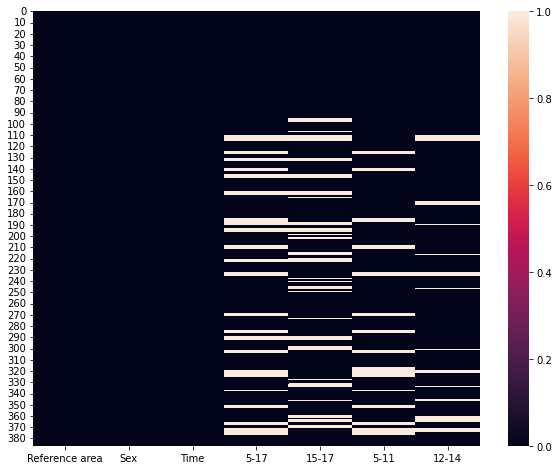

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(childLabor.isna())

Most of the nulls are in the columns of % of children who are engaged in economic activity and household chores (%) by age groups.

We could fill each column with the average value for each country (could be done year wise, but i think country wise makes more sense due to demographic influence).
However, i think dropping the null values is easier at this point

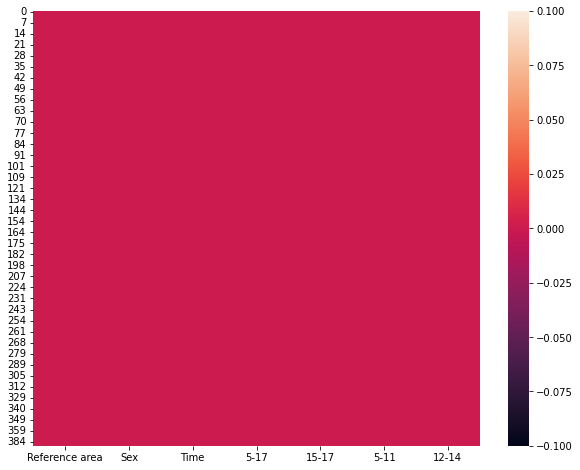

In [ ]:
childLabor.dropna(inplace=True)
plt.figure(figsize=(10,8))
sns.heatmap(childLabor.isna())

## Cluster the last 4 columns:

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
inertiaList=[]
for k in range(2,20):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(childLabor[['5-17','15-17','5-11','12-14']])
    inertiaList.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

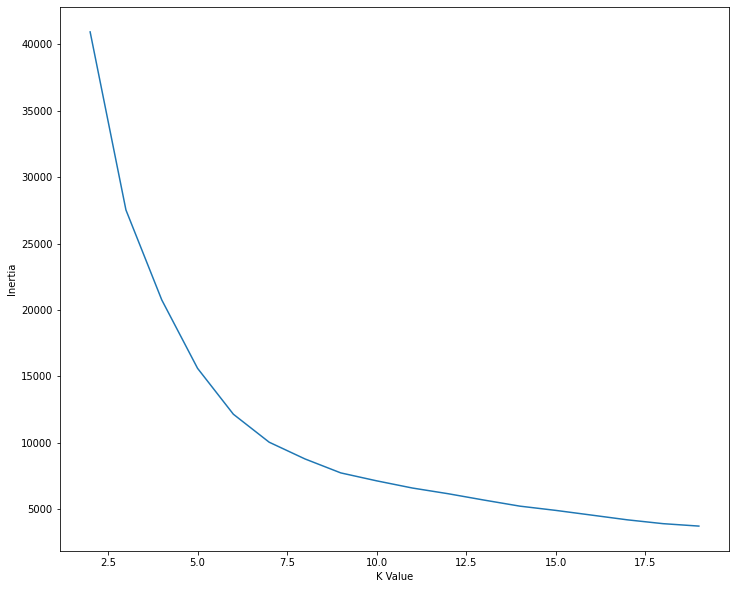

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(range(2,20),inertiaList)
plt.xlabel("K Value")
plt.ylabel("Inertia")

Note the "Elbow point" occurs arround k=4 or so. So optimal number of clusters can be 4 clusters

In [ ]:
model=KMeans(n_clusters=4)
label=model.fit_predict(childLabor[['5-17','15-17','5-11','12-14']])

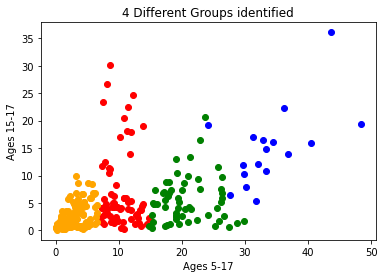

In [ ]:
df=childLabor[['5-17','15-17','5-11','12-14']]
filtered_label0 = df[label == 0]
filtered_label1 = df[label == 1]
filtered_label2 = df[label == 2]
filtered_label3 = df[label == 3]
#filtered_label4 = df[label == 4]
#plotting the results
plt.scatter(filtered_label0['5-17'] , filtered_label0['15-17'],color='red')
plt.scatter(filtered_label1['5-17'] , filtered_label1['15-17'],color='blue')
plt.scatter(filtered_label2['5-17'] , filtered_label2['15-17'],color='orange')
plt.scatter(filtered_label3['5-17'] , filtered_label3['15-17'],color='green')
#plt.scatter(filtered_label4['5-17'] , filtered_label4['15-17'],color='green')
plt.title("4 Different Groups identified")
plt.xlabel("Ages 5-17")
plt.ylabel("Ages 15-17")
plt.show()

Implies the 4 different socio-economic groups of countries.

Let us examine the Correlations between each of these columns:

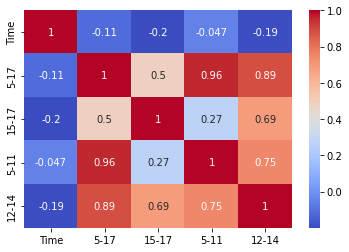

In [ ]:
sns.heatmap(childLabor.corr(),annot=True,cmap='coolwarm')

## Feature Selection as Association Mining using 1R on WEKA:
Principle: Assume that we want to predict "Class" Reference Area.
This is because using the last 4 attributes to predict reference area would be a good to check correlations.

The results are as follows:

Ranked attributes:

 3.876    5-11

 3.101    5-17

 2.842    15-17

 2.326    12-14

 1.55     Time

 0        Sex


Justifications: 

The 4 different socio-economic factors identified above during clustering can be seen to effect the different age groups that engage in economic activity. Some possible explainations would be:

- Ages 5-11 working is very young -> easy to determine country (perhaps due to poverty line). Forced to work
- Ages 5-17 is overall amount of children working -> Not every country allows working children
- Ages 15-17 is prominent in some countries such as USA where students in grade 10 and above are encouraged to find part time jobs to gain experience and earn pocket money
- Ages 12-14 very uncommon. Children not forced to work, and not ready to work willingly
- Time and Sex have repeated values for different countries, not aiding in prediction



# Vaccine Dataset Exploration:

In [ ]:
vaccine = pd.read_csv(loc+"vaccination-data.csv")
vaccine

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
0,Afghanistan,AFG,EMRO,REPORTING,2021-11-28,4396007,3896787.0,11.293,10.010,3564819.0,9.157,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2021-02-22,4.0
1,Albania,ALB,EURO,REPORTING,2021-11-28,2035737,1078240.0,70.700,37.887,957497.0,33.644,"AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...",2021-01-13,5.0
2,Algeria,DZA,AFRO,REPORTING,2021-11-30,12293060,6875003.0,28.034,15.678,5391232.0,12.294,"Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid...",2021-01-30,4.0
3,American Samoa,ASM,WPRO,REPORTING,2021-11-30,67444,35382.0,122.188,64.101,31251.0,56.617,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...",2020-12-21,3.0
4,Andorra,AND,EURO,REPORTING,2021-10-31,104534,54999.0,135.300,72.199,49535.0,65.026,"AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfi...",2021-01-20,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,Viet Nam,VNM,WPRO,REPORTING,2021-11-25,116328185,68934236.0,119.509,70.819,47393949.0,48.690,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-03-08,6.0
224,Wallis and Futuna,WLF,WPRO,REPORTING,2021-11-26,11939,6016.0,106.162,53.495,5923.0,52.668,Moderna - Spikevax,2021-03-19,1.0
225,Yemen,YEM,EMRO,REPORTING,2021-12-02,786027,556652.0,2.635,1.866,366587.0,1.229,"Janssen - Ad26.COV 2-S,SII - Covishield,Sinova...",2021-04-20,3.0
226,Zambia,ZMB,AFRO,REPORTING,2021-11-18,985443,806611.0,5.360,4.388,626900.0,3.410,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2021-04-14,3.0


In [ ]:
vaccine.describe()

,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,NUMBER_VACCINES_TYPES_USED
count,2.280000e+02,2.230000e+02,228.000000,223.000000,2.240000e+02,224.000000,225.000000
mean,3.488048e+07,1.919433e+07,95.909083,49.358830,1.508233e+07,43.020920,3.808889
std,1.881662e+08,1.006739e+08,59.062577,27.107931,8.083069e+07,26.417789,1.828326
min,7.400000e+01,3.700000e+01,0.024000,0.015000,3.700000e+01,0.008000,1.000000
25%,2.710940e+05,1.526895e+05,45.828250,26.951500,1.201238e+05,21.236750,2.000000
50%,1.897216e+06,1.078920e+06,99.400000,53.495000,8.130390e+05,45.116000,4.000000
75%,1.180188e+07,6.655474e+06,143.418750,71.809500,5.224930e+06,65.759000,5.000000
max,2.483096e+09,1.240357e+09,296.070000,121.679000,1.089827e+09,118.201000,10.000000


In [ ]:
vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   COUNTRY                               228 non-null    object 
 1   ISO3                                  228 non-null    object 
 2   WHO_REGION                            228 non-null    object 
 3   DATA_SOURCE                           228 non-null    object 
 4   DATE_UPDATED                          228 non-null    object 
 5   TOTAL_VACCINATIONS                    228 non-null    int64  
 6   PERSONS_VACCINATED_1PLUS_DOSE         223 non-null    float64
 7   TOTAL_VACCINATIONS_PER100             228 non-null    float64
 8   PERSONS_VACCINATED_1PLUS_DOSE_PER100  223 non-null    float64
 9   PERSONS_FULLY_VACCINATED              224 non-null    float64
 10  PERSONS_FULLY_VACCINATED_PER100       224 non-null    float64
 11  VACCINES_USED      

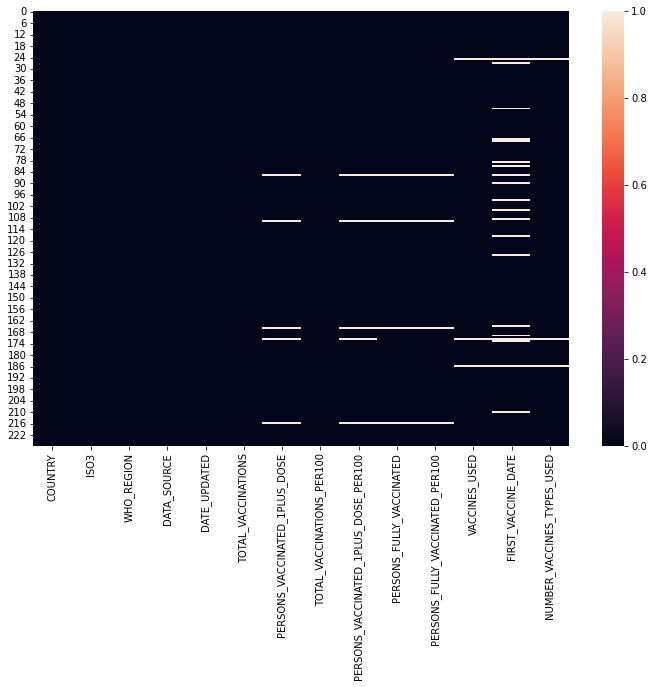

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(vaccine.isna())

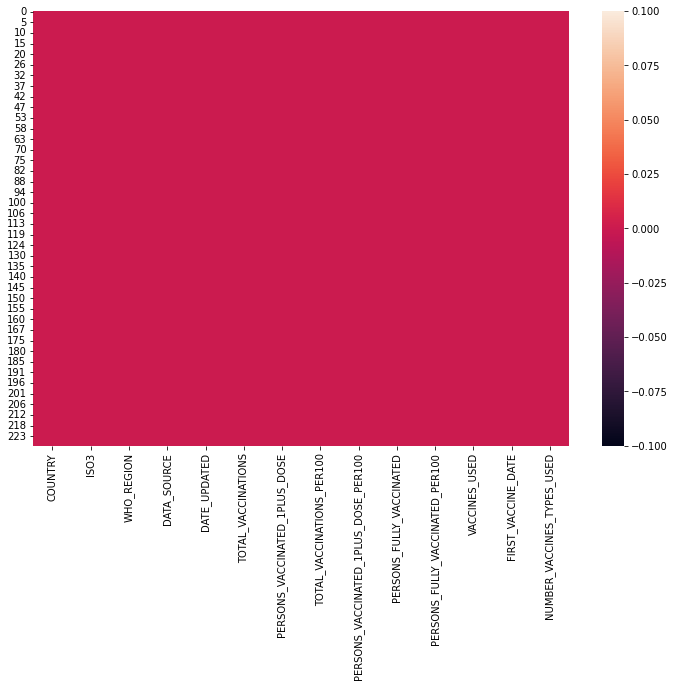

In [ ]:
vaccine.dropna(axis=0,inplace=True)
plt.figure(figsize=(12,8))
sns.heatmap(vaccine.isna())

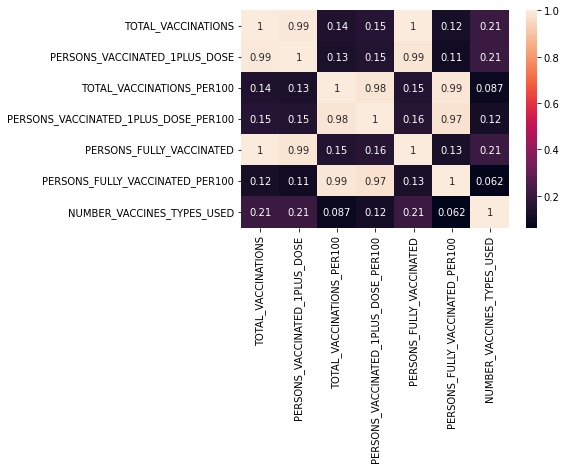

In [ ]:
sns.heatmap(vaccine.corr(),annot=True)

In [ ]:
inertiaList=[]
for k in range(2,20):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(vaccine[ ['TOTAL_VACCINATIONS','PERSONS_VACCINATED_1PLUS_DOSE','TOTAL_VACCINATIONS_PER100','PERSONS_VACCINATED_1PLUS_DOSE_PER100','PERSONS_FULLY_VACCINATED','PERSONS_FULLY_VACCINATED_PER100','NUMBER_VACCINES_TYPES_USED'] ])
    inertiaList.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

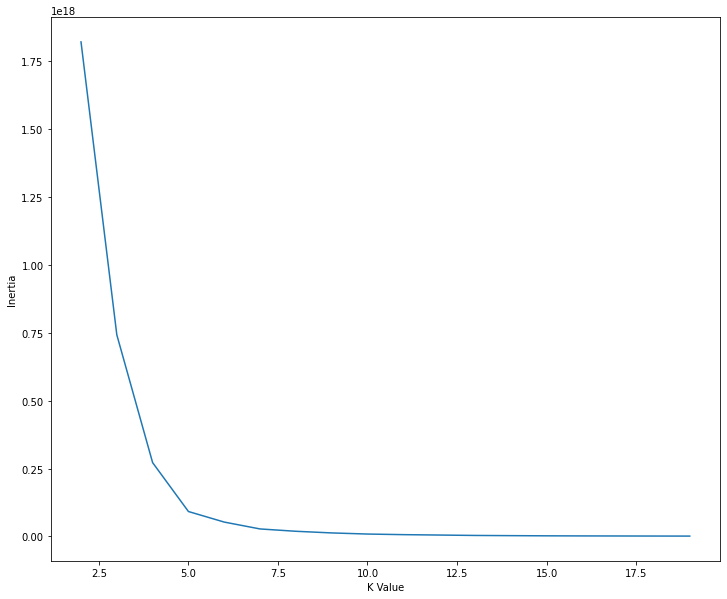

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(range(2,20),inertiaList)
plt.xlabel("K Value")
plt.ylabel("Inertia")

Elbow Point looks like 5

In [ ]:
model=KMeans(n_clusters=5)
label=model.fit_predict(vaccine[ ['TOTAL_VACCINATIONS','PERSONS_VACCINATED_1PLUS_DOSE','TOTAL_VACCINATIONS_PER100','PERSONS_VACCINATED_1PLUS_DOSE_PER100','PERSONS_FULLY_VACCINATED','PERSONS_FULLY_VACCINATED_PER100','NUMBER_VACCINES_TYPES_USED'] ])

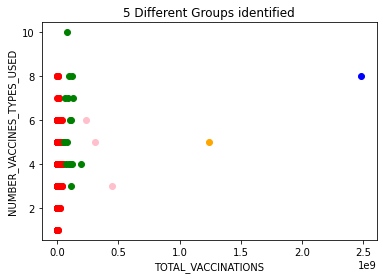

In [ ]:
df=vaccine[ ['TOTAL_VACCINATIONS','PERSONS_VACCINATED_1PLUS_DOSE','TOTAL_VACCINATIONS_PER100','PERSONS_VACCINATED_1PLUS_DOSE_PER100','PERSONS_FULLY_VACCINATED','PERSONS_FULLY_VACCINATED_PER100','NUMBER_VACCINES_TYPES_USED'] ]
filtered_label0 = df[label == 0]
filtered_label1 = df[label == 1]
filtered_label2 = df[label == 2]
filtered_label3 = df[label == 3]
filtered_label4 = df[label == 4]
x='TOTAL_VACCINATIONS'
y='NUMBER_VACCINES_TYPES_USED'
#plotting the results
plt.scatter(filtered_label0[x] , filtered_label0[y],color='red')
plt.scatter(filtered_label1[x] , filtered_label1[y],color='blue')
plt.scatter(filtered_label2[x] , filtered_label2[y],color='orange')
plt.scatter(filtered_label3[x] , filtered_label3[y],color='pink')
plt.scatter(filtered_label4[x] , filtered_label4[y],color='green')
plt.title("5 Different Groups identified")
plt.xlabel(x)
plt.ylabel(y)
plt.show()